## Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

# Model
from sklearn.tree import DecisionTreeClassifier


# For reproducible results
RANDOM_STATE_SEED = 420

In [14]:
df_dataset = pd.read_csv("processed_dataset.csv")
df_dataset


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364013,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364014,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364015,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0
1364016,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [16]:
print(np.any(np.isnan(df_dataset)))
print(np.any(np.isfinite(df_dataset)))

False
True


In [15]:
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_dataset[df_dataset.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df_dataset.dropna(inplace=True)

In [ ]:
# pd.DataFrame(np.where(np.isfinite(df_dataset)))

In [6]:
print(np.any(np.isnan(df_dataset)))
print(np.any(np.isfinite(df_dataset)))

False
True


In [ ]:
print(df_dataset[:,0].shape)
index = 0
for i in df_dataset[:,0]:
    if not np.isfinite(i):
        print(index, i)
    index +=1

In [17]:
X = np.array(df_dataset)
X

array([[1.41385000e+05, 9.00000000e+00, 7.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.81000000e+02, 2.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.79824000e+05, 1.10000000e+01, 1.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.12640543e+08, 3.00000000e+00, 0.00000000e+00, ...,
        5.63000000e+07, 5.63000000e+07, 0.00000000e+00],
       [4.10000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.60000000e+01, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [18]:
y = np.array(df_dataset.pop('Label'))
y

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
print(df_X.shape)
print(df_y.shape)

NameError: name 'df_X' is not defined

In [20]:
# train, test = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=RANDOM_STATE_SEED)

In [21]:
print(df_dataset.shape)
print("TRAIN:")
print(X_train.shape)
print(y_train.shape)

print("TEST")
print(X_test.shape)
print(y_test.shape)

(1363855, 76)
TRAIN:
(913782, 77)
(913782,)
TEST
(450073, 77)
(450073,)


In [23]:
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [24]:
hyperparameters = {
    'max_depth': [i for i in range(1, 20)]
}

In [25]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [26]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19]},
             verbose=1)

In [ ]:
# print(np.any(np.isnan(X_train)))
# print(np.any(np.isfinite(X_train)))


In [27]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

1.0
---------------
Best performing hyperparameters on Validation set: 
{'max_depth': 1}
---------------
DecisionTreeClassifier(max_depth=1)


In [28]:
model = clf.best_estimator_
model

DecisionTreeClassifier(max_depth=1)

In [29]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [34]:
print(accuracy_score(y_test, predictions))

1.0


In [35]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[354551      0]
 [     0  95522]]


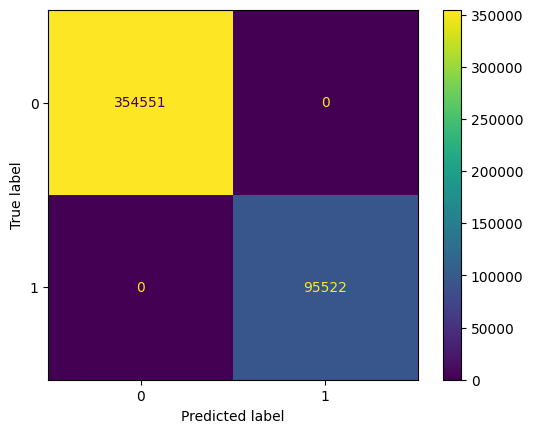

In [45]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test)

In [41]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


d:\_Jaime\02 UPTP\_CLASES\06 SEXTO SEMESTRE\07 CAPSOTNE\07 Code\MJCapstone\.venv\Scripts\python.exe: No module named install
